# **Bank Customer Churn**

**Objective:** The Bank Customer Churn project involves importing and preprocessing customer data using pandas, numpy, and seaborn for data manipulation and visualization. We analyze the data to identify patterns and features that influence churn. We apply machine learning techniques using scikit-learn, utilizing tools like GridSearchCV for hyperparameter tuning to build models that predict whether a customer is likely to leave the bank. The project also uses imbalanced-learn to handle imbalanced datasets, matplotlib for creating visualizations, and classification metrics from scikit-learn to evaluate model performance. By evaluating the models’ performance and visualizing the results, the project aims to provide insights into customer behavior, helping the bank develop strategies to retain customers and reduce churn.

**Data Source:** YBI Foundation Github

# **Import Library**

In [175]:
import pandas as pd

In [176]:
import numpy as np

In [177]:
import matplotlib.pyplot as plt


In [178]:
import seaborn as sns

# **Import Data**

In [179]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [180]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [182]:
df.duplicated('CustomerId').sum()

0

In [183]:
df = df.set_index('CustomerId')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# **Encoding**

In [185]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [186]:
df.replace({'Geography' :{'France' : 2, 'Germany':1, 'Spain' :0}}, inplace=True)

In [187]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [188]:
df.replace({'Gender': {'Male': 0, 'Female':1}}, inplace=True)

In [189]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [190]:
df.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [191]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [192]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [193]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [194]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

In [195]:
df['Zero Balance']

CustomerId
15634602    0
15647311    1
15619304    1
15701354    0
15737888    1
           ..
15606229    0
15569892    1
15584532    0
15682355    1
15628319    1
Name: Zero Balance, Length: 10000, dtype: int64

In [196]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# **Define Label and Features**

In [197]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [198]:
x = df.drop(['Surname','Churn'], axis = 1)

In [199]:
y = df['Churn']

In [200]:
x.shape, y.shape

((10000, 11), (10000,))

In [201]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

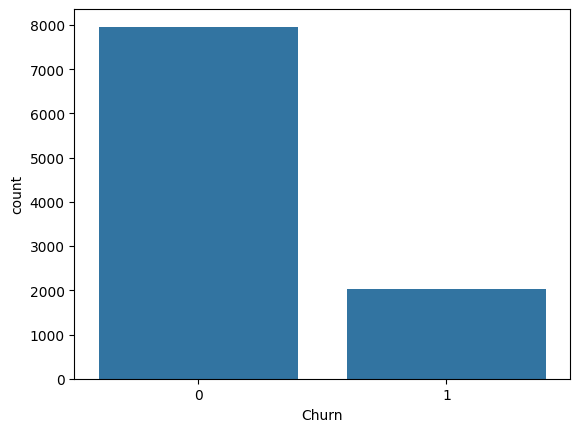

In [202]:
sns.countplot(x ='Churn', data =df);

In [203]:
x.shape, y.shape

((10000, 11), (10000,))

# **Random Under Sampling**

In [204]:
from imblearn.under_sampling import RandomUnderSampler

In [205]:
rus = RandomUnderSampler(random_state=2529)

In [206]:
x_rus, y_rus = rus.fit_resample(x,y)

In [207]:
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [208]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [209]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

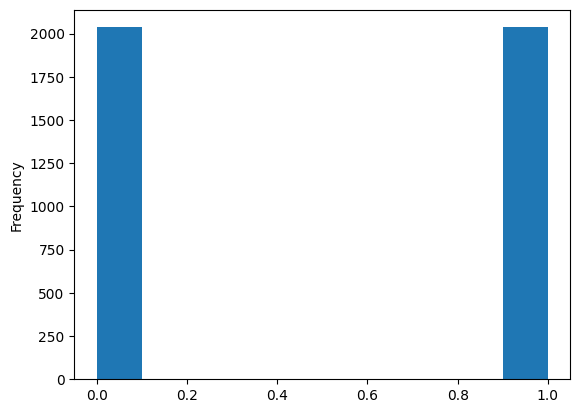

In [210]:
y_rus.plot(kind = 'hist')

# **Train Test Split**

In [211]:
from sklearn.model_selection import train_test_split

# **Split Original Data**

In [212]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=12529)

# **Split Random Under Sample Data**

In [213]:
x_train_rus, x_test_rus,y_train_rus, y_test_rus = train_test_split(x_rus,y_rus,test_size=0.3,random_state=12529)

# **Standardize Features**

In [214]:
from sklearn.preprocessing import StandardScaler

In [215]:
sc = StandardScaler()

# **Standardize Original Data**

In [216]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']])

In [217]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance', 'Estimated Salary']])

# **Support Vector Machine Classifier**

In [218]:
from sklearn.svm import SVC

In [219]:
svc = SVC()

In [220]:
svc.fit(x_train, y_train)

SVC()

In [221]:
y_pred = svc.predict(x_test)

# **Model Acurracy**

In [222]:
from sklearn.metrics import confusion_matrix, classification_report

In [223]:
confusion_matrix(y_test, y_pred)

array([[2321,   31],
       [ 491,  157]])

In [224]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2352
           1       0.84      0.24      0.38       648

    accuracy                           0.83      3000
   macro avg       0.83      0.61      0.64      3000
weighted avg       0.83      0.83      0.79      3000



# **HyperParametric Tunning**

In [225]:
from sklearn.model_selection import GridSearchCV

In [226]:
param_grid = {'C':[0.1,1,10],
               'gamma': [1,0.1,0.01],
               'kernel': ['rbf'],
               'class_weight': ['balanced']}


In [227]:
grid = GridSearchCV(SVC(),param_grid, refit=True,verbose=2, cv = 2)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [228]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [229]:
grid_predictions = grid.predict(x_test)

In [230]:
confusion_matrix(y_test,grid_predictions)

array([[2116,  236],
       [ 427,  221]])

In [231]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2352
           1       0.48      0.34      0.40       648

    accuracy                           0.78      3000
   macro avg       0.66      0.62      0.63      3000
weighted avg       0.76      0.78      0.76      3000



# **Model With Random Under Sampling**

In [232]:
svc_rus = SVC()

In [233]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [234]:
y_pred_rus = svc_rus.predict(x_test_rus)

# **Model Accuracy**

In [235]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[236, 363],
       [157, 467]])

In [236]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.60      0.39      0.48       599
           1       0.56      0.75      0.64       624

    accuracy                           0.57      1223
   macro avg       0.58      0.57      0.56      1223
weighted avg       0.58      0.57      0.56      1223



# **Hyperparameter Tunning**

In [237]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight' : ['balanced']}

In [238]:
grid_rus = GridSearchCV(SVC(),param_grid, refit=True,verbose=2, cv = 2)
grid_rus.fit(x_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [239]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [240]:
grid_predictions_rus = grid_rus.predict(x_test)

In [241]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[236, 363],
       [157, 467]])

In [242]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.60      0.39      0.48       599
           1       0.56      0.75      0.64       624

    accuracy                           0.57      1223
   macro avg       0.58      0.57      0.56      1223
weighted avg       0.58      0.57      0.56      1223

